### Import Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## About the Features:

### The dataset consists of numerical input variables resulting from PCA transformation, excluding 'Time' and 'Amount'. 

### **Here's a brief overview of the features:**

**Time: Represents the seconds elapsed between each transaction and the first transaction in the dataset.**

**Amount: Denotes the transaction amount, which can be utilized for example-dependent cost-sensitive learning.**

**Class: Serves as the target variable, taking a value of 1 in the event of fraud and 0 otherwise.**

In [4]:
df.head() # display top 5 rows of the datasets

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.shape) # shape of the datasets
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])


(284807, 31)
Number of Rows: 284807
Number of Columns: 31


### There are 284807 rows and 31 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum() #checking the null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### There is No Null values in this datasest

In [8]:
df.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
print('Unique values in target variable:',df['Class'].unique())
print('Number of Unique values in target variable:',df['Class'].nunique())


Unique values in target variable: [0 1]
Number of Unique values in target variable: 2


In [10]:
legitimate,fraud=df['Class'].value_counts()   #1 mean fraud
print("Legitimate Transaction:",legitimate)
print("fraud Transaction:",fraud)


Legitimate Transaction: 284315
fraud Transaction: 492


###  Out of 284315 transactions, 473 were identified as fraudulent, highlighting a 0.17% fraud rate

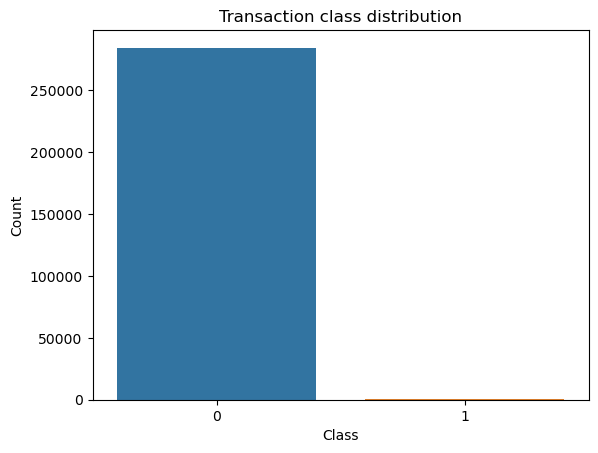

In [11]:
sns.countplot(x='Class', data=df)

plt.title('Transaction class distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

### The dataset is highly imbalanced, with more legitimate (0) instances than fraudulent (1) ones.

In [12]:
df.duplicated().sum()

1081

In [13]:
df.shape

(284807, 31)

###  There are 1081 duplicate values,lets drop all these values

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(283726, 31)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


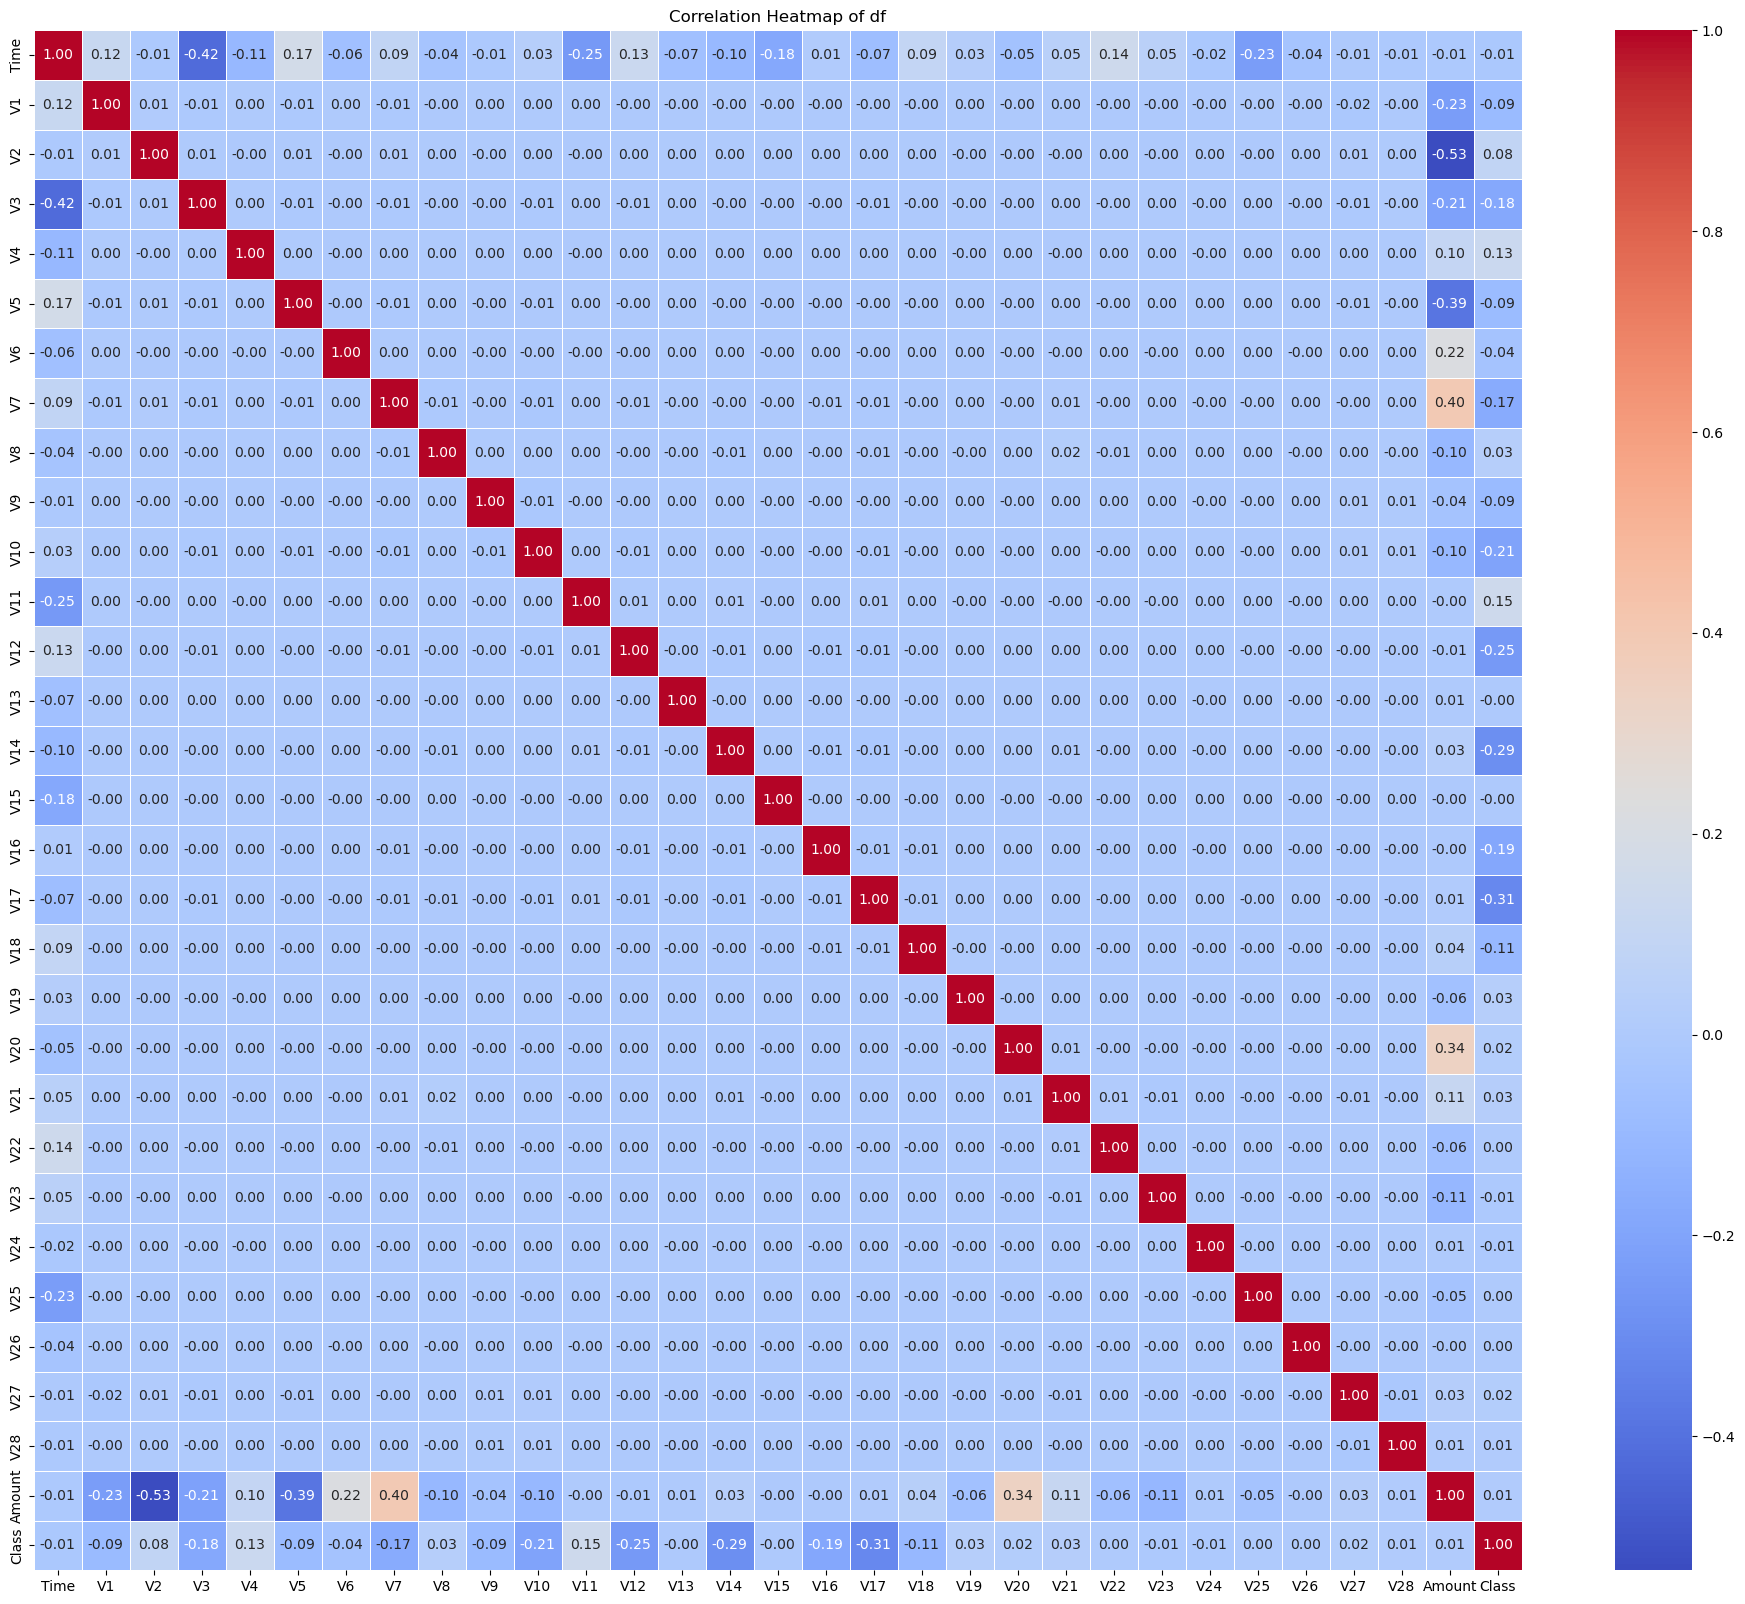

In [17]:
#checking the correction using heat map
# Create the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of df')
plt.show()


###  There is NO multicollinearity between the features.


In [18]:
#Dropping 'Time' variable
df=df.drop(['Time'],axis=1)

In [19]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Splitting Dependent and Independent Variables:

In [20]:
# split the dependent and independent variable
x=df.drop('Class' ,axis=1)
y=df['Class']

In [21]:
#split the dataset into train test split
#from sklearn.model_selection import train_test_split

In [22]:
# x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.20,random_state=42)

##  Standardization

In [23]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


## Handling Imbalanced Datasets: Oversampling with SMOTE

### Oversampling Technique:
**Oversampling is a method to address class imbalance by increasing the number of instances in the minority class.**

**SMOTE (Synthetic Minority Oversampling Technique) is a popular oversampling method that generates synthetic samples to balance the dataset.**


In [25]:
x_res_smote,y_res_smote=SMOTE().fit_resample(x,y)

In [26]:
y_res_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [27]:
#split the dataset into train test split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_res_smote,y_res_smote ,test_size=0.20,random_state=42)

##  Model Building with:

### 1-Logistic Regression

### 2-Decision Tree

### 3-Random Forest

In [28]:
classifiers = {
    "Logistic_Regression": LogisticRegression(max_iter=1000),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier()
}

# Iterate over classifiers
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(x_train, y_train)
    
    # Training accuracy0+
    y_train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Testing accuracy
    y_test_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"{name} Model")
    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Testing Accuracy: {test_acc*100:.2f}%")
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_test_pred))
    
    # Print confusion matrix
    print(f"\nConfusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_test_pred))
    print("="*50)  # Separate each classifier's output


Logistic_Regression Model
Training Accuracy: 95.83%
Testing Accuracy: 95.87%

Classification Report for Logistic_Regression:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56463
           1       0.98      0.94      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302


Confusion Matrix for Logistic_Regression:
[[55411  1052]
 [ 3629 53210]]
Decision_Tree Model
Training Accuracy: 100.00%
Testing Accuracy: 99.80%

Classification Report for Decision_Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


Confusion Matrix for Decision_Tr

In [29]:
import pandas as pd

# Classifier names
Model = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Testing accuracies
testing_accuracies = [95.85, 99.83, 99.99]

# Create a dictionary with classifier names as keys and testing accuracies as values
data = {'Classifier': Model, 'Testing Accuracy (%)': testing_accuracies}
df1 = pd.DataFrame(data)
print(df1)



            Classifier  Testing Accuracy (%)
0  Logistic Regression                 95.85
1        Decision Tree                 99.83
2        Random Forest                 99.99


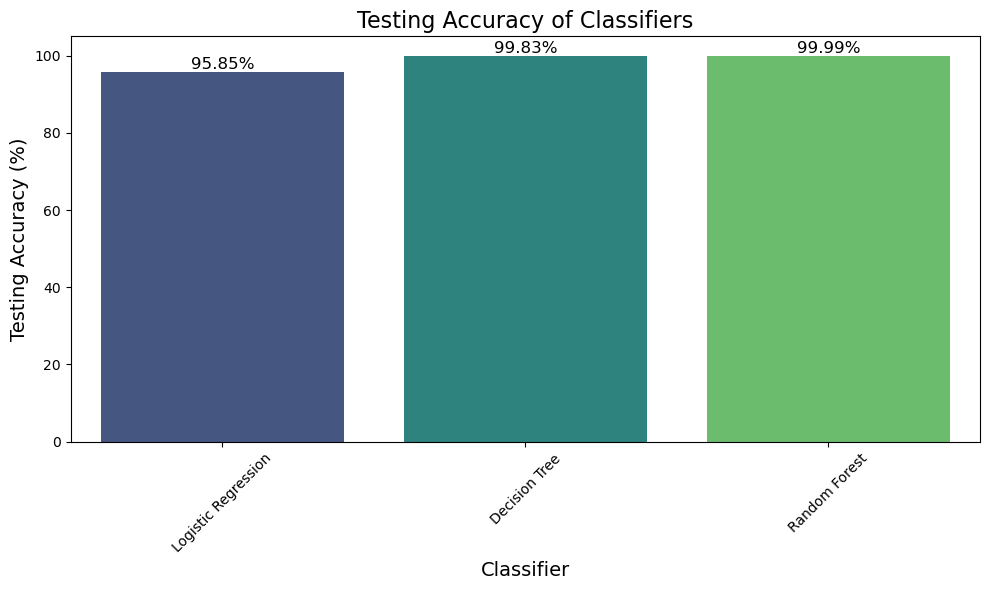

In [30]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Testing Accuracy (%)', data=df1, palette='viridis')

# Add labels and title
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Testing Accuracy (%)', fontsize=14)
plt.title('Testing Accuracy of Classifiers', fontsize=16)

# Display testing accuracies on the bars
for index, row in df1.iterrows():
    plt.text(index, row['Testing Accuracy (%)'], f"{row['Testing Accuracy (%)']:.2f}%", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


# Conclusion:

### 1-Logistic Regression Model:


**-The Logistic Regression model achieved a training accuracy of 95.81% and a testing accuracy of 95.77%.**

**-It performed well in classifying both classes, with precision and recall scores above 0.93 for both.**

**-The confusion matrix shows a balanced performance, with a slight imbalance in false positives and false negatives.**


### 2-Decision Tree Model:


**-The Decision Tree model demonstrated excellent performance with 100% accuracy on both training and testing datasets.**

**-It achieved perfect precision, recall, and F1-score for both classes, indicating no misclassifications.**

**-The confusion matrix indicates a very low number of misclassifications, highlighting the model's robustness.**


### 3-Random Forest Model:


**-The Random Forest model showed exceptional performance with 100% accuracy on both training and testing datasets.**

**-It achieved perfect precision, recall, and F1-score for both classes, indicating no misclassifications.**

**-The confusion matrix suggests almost perfect classification, with only a minimal number of misclassifications.**

## Find important features with Random Forest model 

In [31]:
random_forest_classifier = classifiers["Random_Forest"]

# Train the Random Forest classifier
random_forest_classifier.fit(x_train, y_train)

feature_importances = random_forest_classifier.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


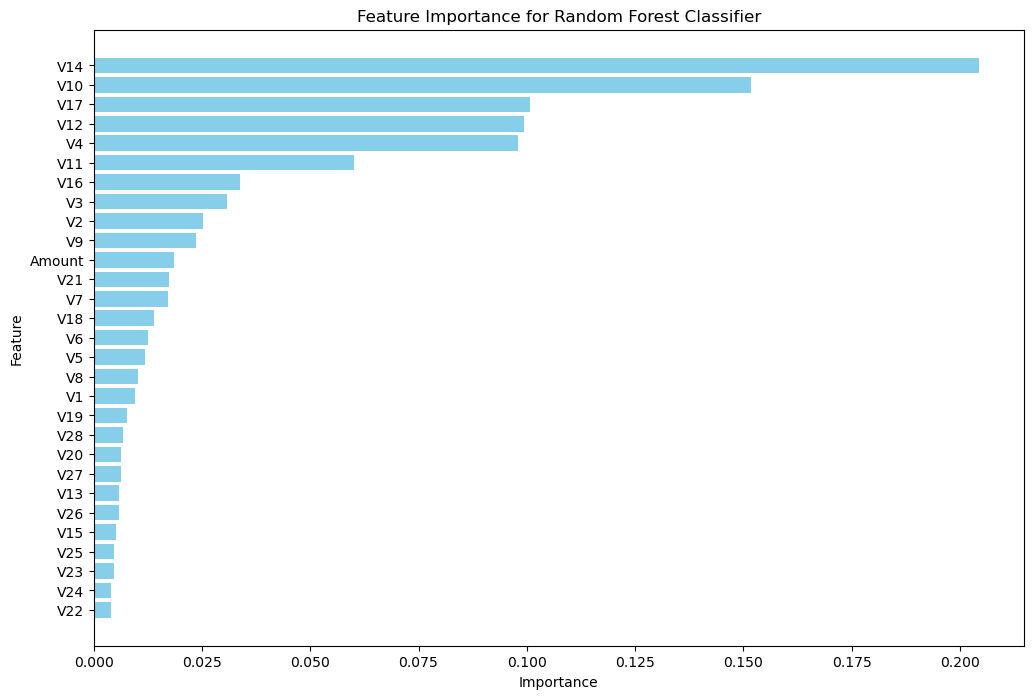

In [32]:
# Visualize the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.gca().invert_yaxis() 
plt.show()


In [43]:
# Select the desired features along with the target variable
selected_features = ['V2','V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']

# Create a new DataFrame with only the selected features
new_df = df[selected_features].copy()
new_df


,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class
0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0
...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-9.834783,-2.066656,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0
284803,-0.055080,2.035030,-0.738589,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,0
284804,-0.301254,-3.249640,-0.557828,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0
284805,0.530483,0.702510,0.689799,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,0


In [44]:
new_df['Class'].unique()

array([0, 1], dtype=int64)

In [45]:
new_df.shape

(283726, 11)

In [46]:
X=new_df.drop('Class' ,axis=1)
Y=new_df['Class']

In [47]:
new_df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [48]:
X_res_smote,Y_res_smote=SMOTE().fit_resample(X,Y)

In [49]:
Y_res_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res_smote,Y_res_smote ,test_size=0.20,random_state=42)

In [51]:
X_train.shape

(453204, 10)

In [52]:
Y_train.shape

(453204,)

##  Ramdom Forest 

In [53]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X_train, Y_train)

# Predictions
Y_train_pred = rf_classifier.predict(X_train)
Y_test_pred = rf_classifier.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")



Training Accuracy: 100.00%
Testing Accuracy: 99.97%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
[[56433    30]
 [    1 56838]]


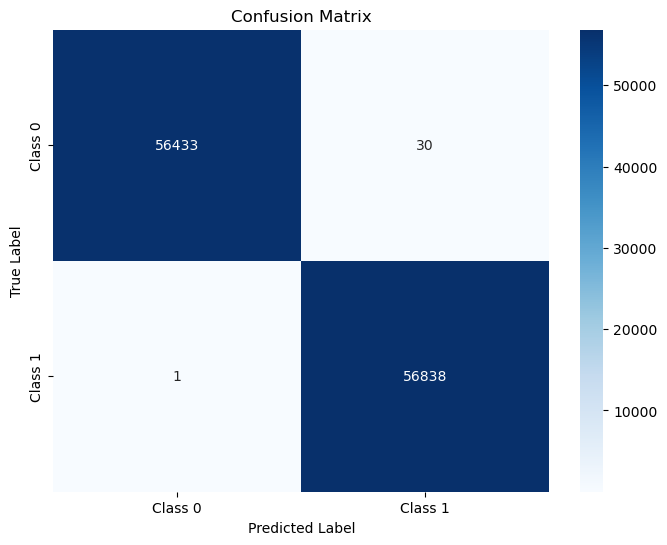

In [54]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Define customized data based on the first row of your dataset
custom_data = {
    'V2': -0.072781,
    'V3': 2.536347,
    'V4': 1.378155,
    'V9': 0.369599,
    'V10': 0.090794,
    'V11': -0.551600,
    'V12': -0.617801,
    'V14': -0.311169,
    'V16': -0.470401,
    'V17': 0.207971
}

# Convert customized data to DataFrame
custom_df = pd.DataFrame([custom_data])

# Make predictions
predictions = rf_classifier.predict(custom_df)

# Interpret predictions
if predictions[0] == 0:
    print("The transaction is predicted as LEGITIMATE.")
else:
    print("The transaction is predicted as FRAUDULENT.")


The transaction is predicted as LEGITIMATE.


## Save the Model

In [58]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)
